In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sb
import numpy as np
from scipy import stats



print(os.listdir("/Users/geraldine/Documents/IDS/DATASET/datafifth"))

['.DS_Store', 'new_data_test.csv', 'new_data_train.csv']


In [5]:
pd.options.display.max_columns = None

In [6]:
train=pd.read_csv("/Users/geraldine/Documents/IDS/DATASET/datafifth/new_data_train.csv", index_col = 0)
train.head()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,508,508,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
1,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
2,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,4,1.0,0.0,0.03,0.09,0.0,255,4,0.1,0.0,0.0,1
3,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1
4,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0,1


In [7]:
test=pd.read_csv("/Users/geraldine/Documents/IDS/DATASET/datafifth/new_data_test.csv", index_col = 0)
test.head()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1
1,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1
2,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,268,11,1.0,0.0,0.04,0.06,0.0,255,11,0.08,0.0,0.0,1
3,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,13,1.0,0.0,0.11,0.07,0.0,255,13,0.06,0.0,0.0,1
4,0,0,9,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0,1


# Partimos nuesros datos

In [8]:
#Crea nuestras variables predictoras X y nuestra variable objetivo Y
X = train.drop('attack',axis=1)
y = train['attack']

In [9]:
X.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,508,508,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0
1,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0
2,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,4,1.0,0.0,0.03,0.09,0.0,255,4,0.1,0.0,0.0
3,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0
4,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.0,1.0,0.0


In [10]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: attack, dtype: int64

In [11]:
#Dividimos cada variable para el entrenamiento del modelo importando la lilbrería train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.15,random_state=1) #Separamos el 15% de la data para generar las predicciones

In [12]:
#Mostramos con el parámetro shape la cantidad de filas que resultaron en cada parte
print('Para el X_train:', X_train.shape, 'y para el y_train',y_train.shape)
print('Para el X_test:',X_test.shape,'y para el y_test',y_test.shape)

Para el X_train: (2914565, 31) y para el y_train (2914565,)
Para el X_test: (514336, 31) y para el y_test (514336,)


## Modelo árbol de decisión 

In [13]:
#Entrenamos los datos importando la librería DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train,y_train)
tree_y_pred = decision_tree.predict(X_test)
tree_y_pred 

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
from sklearn.metrics import accuracy_score
print('La precision para mi modelo es :{0:.8f}'.format(accuracy_score(y_test,tree_y_pred))) #Mostramos la expresión regex .8f para mostrar 8 decimales

La precision para mi modelo es :0.99993001


## Optimizacion del modelo

In [16]:
#Variamos la profundidad de las ramas del árbol de decisión obtenemos el valor óptimo
for i in range(0,30):
    decision_tree = DecisionTreeClassifier(max_depth=i+2)
    decision_tree.fit(X_train,y_train)
    y_pred = decision_tree.predict(X_test)
    print("El arbol da un precision de:", accuracy_score(y_test,y_pred), "cuando su max_depth es: ", i+2)

El arbol da un precision de: 0.9937492222982641 cuando su max_depth es:  2
El arbol da un precision de: 0.995940396938966 cuando su max_depth es:  3
El arbol da un precision de: 0.9971302805947863 cuando su max_depth es:  4
El arbol da un precision de: 0.9975094101910036 cuando su max_depth es:  5
El arbol da un precision de: 0.9977057798793006 cuando su max_depth es:  6
El arbol da un precision de: 0.9987965065638027 cuando su max_depth es:  7
El arbol da un precision de: 0.9993292322528464 cuando su max_depth es:  8
El arbol da un precision de: 0.9994808840913333 cuando su max_depth es:  9
El arbol da un precision de: 0.9995917065886891 cuando su max_depth es:  10
El arbol da un precision de: 0.999628647421141 cuando su max_depth es:  11
El arbol da un precision de: 0.999716138866422 cuando su max_depth es:  12
El arbol da un precision de: 0.9998250171094382 cuando su max_depth es:  13
El arbol da un precision de: 0.9998522366701923 cuando su max_depth es:  14
El arbol da un precisio

In [18]:
#Obtenemos las nuevas predicciones para el árbol de clasificación con max_depth óptimo
# con una profundidad de 21 siendo este mas optimo 
decision_tree_2= decision_tree.fit(X_train,y_train)


In [19]:
y_pred_tree = decision_tree_2.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print('La precision para mi modelo es :{0:.8f}'.format(accuracy_score(y_pred_tree,tree_y_pred))) #Mostramos la expresión regex .8f para mostrar 8 decimales

La precision para mi modelo es :0.99997278


### Matriz de confusion

[]

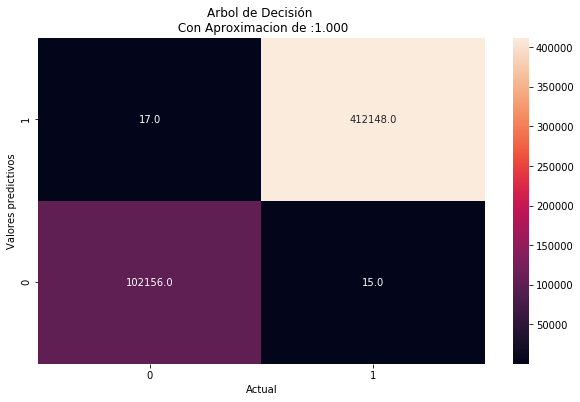

In [21]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,y_pred_tree) 

plt.figure(figsize=(10,6))

plt.title('Arbol de Decisión \n Con Aproximacion de :{0:.3f}'.format(accuracy_score(y_test, y_pred_tree)))
ax=sb.heatmap(conf_matrix, annot = True, annot_kws={"size": 10}, fmt=".1f")
ax.set_ylim((0,2))
plt.xlabel('Actual')
plt.ylabel('Valores predictivos')
plt.plot()

De los cruces que tenemos tenemos 4 números que hace refería al número de filas
o coincidencias, en cada una de ellas está contando cuantas veces el modelo me devuelve un número, es decir 1 y 0
La matrix de confusión podemos ver los cruces para comparar el modelo con lo que tenía en la columna.


## Modelo random forest

In [22]:
#Entrenamos los datos importando la librería RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 30, n_jobs = -1,max_depth=3,random_state=1) #creamos la variable decision_tree para el modelo de random forest
rnd_clf.fit(X_train,y_train) #entrenamos el modelo de random forest usando los datos de X_train, y_train
y_pred_rnd = rnd_clf.predict(X_test) #generamos las predicciones con X_test usando el modelo de random forest
y_pred_rnd #mostramos las predicciones generadas 0 cuando no hubo ataque 1 cuando sí 

array([0, 0, 1, ..., 0, 0, 0])

In [23]:

#Calculamos el score de accuracy comparando las predicciones generadas versus y_test importando la librería accuracy_score
print('Puntuacion de precision :{0:.8f}'.format(accuracy_score(y_test,y_pred_rnd)))

Puntuacion de precision :0.99710501


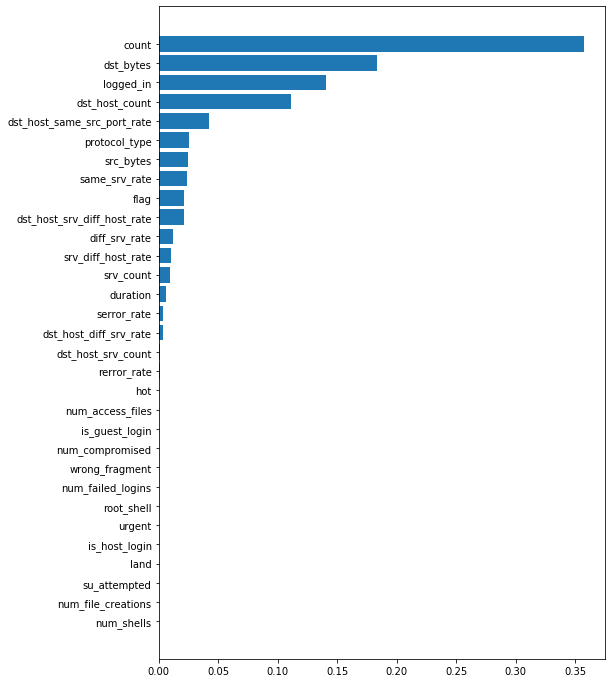

In [24]:
#Graficamos la importancia de cada variable con gráfica de barras usando el método feature_importances_
pesos = rnd_clf.feature_importances_
cols = X_train.columns
plt.figure(figsize=(8,12))
indices = np.argsort(pesos)
plt.barh(range(len(indices)), pesos[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.show()

Eliminamos las variables menos importantes

In [25]:
X_train_2 = X_train.drop([
'diff_srv_rate',
'srv_diff_host_rate',
'srv_count',
'rerror_rate',
'duration',
'dst_host_diff_srv_rate',
'dst_host_srv_count',
'num_access_files',
'land',
'is_host_login',
'su_attempted',
'num_file_creations',
'urgent',
'num_shells',
'root_shell',
'num_failed_logins',
'wrong_fragment',
'num_compromised',
'is_guest_login',
'hot',
'serror_rate'],axis=1)


In [28]:
X_train_2.count()

protocol_type                  2914565
flag                           2914565
src_bytes                      2914565
dst_bytes                      2914565
logged_in                      2914565
count                          2914565
same_srv_rate                  2914565
dst_host_count                 2914565
dst_host_same_src_port_rate    2914565
dst_host_srv_diff_host_rate    2914565
dtype: int64

In [29]:
X_train_2.head(5)

,protocol_type,flag,src_bytes,dst_bytes,logged_in,count,same_srv_rate,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
345707,1,5,0,0,0,226,0.03,255,0.00,0.00
2807405,0,9,1032,0,0,511,1.00,255,1.00,0.00
3132603,1,9,1445,334,1,2,0.50,93,0.01,0.01
2805052,1,5,0,0,0,1,1.00,6,0.17,0.00
2839540,0,9,1032,0,0,511,1.00,255,1.00,0.00


In [30]:
#Entrenamos nuevamente eliminando las variables menos importantes, actualizamos el modelo de random forest y obtenemos nuevas predicciones
rnd_clf_2=rnd_clf.fit(X_train_2,y_train)
predicciones_rnd_clf_2=rnd_clf_2.predict(X_test.drop([
'diff_srv_rate',
'srv_diff_host_rate',
'srv_count',
'rerror_rate',
'duration',
'dst_host_diff_srv_rate',
'dst_host_srv_count',
'num_access_files',
'land',
'is_host_login',
'su_attempted',
'num_file_creations',
'urgent',
'num_shells',
'root_shell',
'num_failed_logins',
'wrong_fragment',
'num_compromised',
'is_guest_login',
'hot',
'serror_rate'],axis=1))
predicciones_rnd_clf_2

array([0, 0, 1, ..., 0, 0, 0])

In [34]:
# Nuevo puntaje comparando y_test con las nuevas predicciones a partir del random forest actualizado
print('Puntaje de precision sin las variables menos importantes :{0:.8f}'.format(accuracy_score(y_test,predicciones_rnd_clf_2)))

Puntaje de precision sin las variables menos importantes :0.99754830


[]

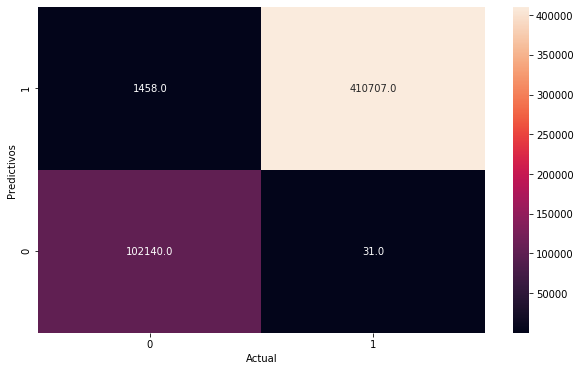

In [35]:
#Graficamos una matriz de confusión comparando y_test con las nuevas predicciones importando confusion_matrix
matriz_confusion = confusion_matrix(y_test,y_pred_rnd)

plt.figure(figsize=(10,6))
ax=sb.heatmap(matriz_confusion, annot = True, annot_kws={"size": 10}, fmt=".1f")
ax.set_ylim((0,2))
plt.xlabel('Actual')
plt.ylabel('Predictivos')
plt.plot()

## Modelo de Regresion logistica

In [37]:
from sklearn.linear_model import LogisticRegression


In [38]:
#Entrenamos los datos importando la librería LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1) 
logreg.fit(X_train, y_train) 
logreg_pred = logreg.predict(X_test) 
logreg_pred

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 1, 1, ..., 0, 0, 0])

In [39]:
#Calculamos el score de accuracy comparando las predicciones generadas versus y_test importando la librería accuracy_score
from sklearn.metrics import accuracy_score
print('El accuracy para mi primero modelo es :{0:.8f}'.format(accuracy_score(y_test,logreg_pred))) 

El accuracy para mi primero modelo es :0.98955741


In [41]:
#Calculamos la probabilidades de obtener 1 (sí hubo ataque) con el método predict_proba
proba_pred_test = logreg.predict_proba(X_test)[:,1]
proba_pred_test

array([1.79782071e-01, 6.01826074e-01, 9.84465439e-01, ...,
       1.32550822e-03, 9.15704323e-04, 2.24823286e-03])

In [42]:
#Creamos una función para variar el punto de corte -por defecto 0.5- comparando con las probabilidades obtenidas y calculamos el score en cada iteración
lista_de_accuracy=[]
for punto_de_corte in range(0,100):
    pred_0_1 = [1 if x >= punto_de_corte/100 else 0 for x in proba_pred_test]
    lista_de_accuracy.append(accuracy_score(y_test, pred_0_1))

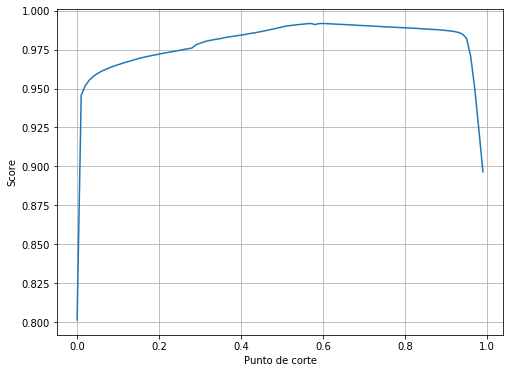

In [90]:
#Dibujamos los puntos de corte con sus respectivos score
xs = [x/100 for x in range(0,100)]
ys = lista_de_accuracy

plt.figure(figsize=(8,6))
plt.grid(True)
plt.xlabel('Punto de corte')
plt.ylabel('Score')
plt.plot(xs, ys)

In [91]:
#Obtenemos neuvas predicciones (0,1) a partir del nuevo punto de corte óptimo a partir de la gráfica obtenida
predicciones_nuevo_pc = [1 if prob>=0.800 else 0 for prob in proba_pred_test]
np.array([predicciones_nuevo_pc])

array([[0, 0, 1, ..., 0, 0, 0]])

In [92]:

#Mostramos un nuevo score comparando y_test con las nuevas predicciones a partir del nuevo punto de corte
print('El accuracy para mi primer modelo con nuevo punto de corte es :{0:.8f}'.format(accuracy_score(y_test,predicciones_nuevo_pc)))

El accuracy para mi primer modelo con nuevo punto de corte es :0.98902274


# EVALUACION DE LOS MODELOS

## CURVA ROC

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 

clasificadores = [decision_tree_2, rnd_clf_2,predicciones_nuevo_pc]

In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 

clasificadores = [logreg, tree_clf, rnd_clf] #Hacemos una lista de clasificadores

tabla_resultados = pd.DataFrame(columns=['clasificadores', 'fpr','tpr','auc']) #Haremos un dataframe (tabla) para almacenar las métricas

for cls in clasificadores: 
    model = cls.fit(X_train, y_train) 
    yproba = model.predict_proba(X_test)[:,1] 
    
    fpr, tpr, _ = roc_curve(y_test,  yproba) #curva roc
    auc = roc_auc_score(y_test, yproba) #métrica auc
    
    tabla_resultados = tabla_resultados.append({'clasificadores':None,
                                      'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [95]:
#Acá simplemente pondremos nuestros clasificadores como index
tabla_resultados['clasificadores'] = ['RegresionLogistica','ArbolDecision','RandomForest']
tabla_resultados.set_index('clasificadores', inplace=True)
tabla_resultados

,fpr,tpr,auc
clasificadores,,,
RegresionLogistica,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 9.704851212499848e-06, 6.550774568437397...",0.997523
ArbolDecision,"[0.0, 0.00011745015708958511, 0.00011745015708...","[0.0, 0.9998568534446156, 0.9998617058702218, ...",0.999914
RandomForest,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.19483459294214694, 0.1953635073332282,...",0.999891


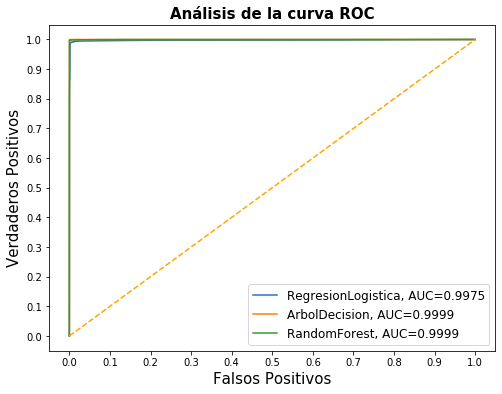

In [96]:
#Dibujamos la curva ROC con los parámetros obtenidos para cada uno de los modelos actualizados
fig = plt.figure(figsize=(8,6))

for i in tabla_resultados.index:
    plt.plot(tabla_resultados.loc[i]['fpr'], 
             tabla_resultados.loc[i]['tpr'], 
             label="{}, AUC={:.4f}".format(i, tabla_resultados.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Falsos Positivos", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Verdaderos Positivos", fontsize=15)

plt.title('Análisis de la curva ROC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()

<BarContainer object of 3 artists>

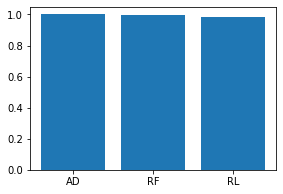

In [97]:
arbol_decision='AD'
random_forest = 'RF'
regresion_logistica = 'RL'
names = [arbol_decision,random_forest,regresion_logistica] 
values = [0.99997278,0.99754830,0.98668769 ] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values) 

# Test para predicciones

Usamos nuestro archivo test para generar nuevas predicciones, en esta ocasiones deseamos realizar las predicciones en base a protocol_type, y darnos cuenta si hay o no ataque.
Este test queda como ejemplo pero a partir de aca se puede cargar cualquier log generado por alguna data de un sistema o servidor.

In [98]:
X_test.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
888686,4255,2,9,145,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0.0,0.0,0.20,0.60,0.0,255,1,0.62,0.96,0.0
2781008,0,2,9,147,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,2,0.0,0.0,0.33,0.50,0.0,255,2,0.47,0.82,0.0
2489970,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,143,13,1.0,0.0,0.09,0.06,0.0,255,12,0.08,0.00,0.0
565617,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,20,1.0,0.0,0.13,0.05,0.0,255,20,0.06,0.00,0.0
2392399,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.00,0.0


In [99]:
X_test.shape

(514336, 31)

In [100]:
test.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0
1,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0
2,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,268,11,1.0,0.0,0.04,0.06,0.0,255,11,0.08,0.0,0.0
3,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,13,1.0,0.0,0.11,0.07,0.0,255,13,0.06,0.0,0.0
4,0,0,9,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0


In [101]:
test.shape

(1469529, 31)

Comparamos los test y revisamos que no tengan variables de mas que no hayan sido borradas, encontramos que falto por actualizar  attack en test. Procedemos a borrarlas.

In [102]:
#Si ya se borro antes la columna 'attack' 
#y se vuelve a correr este codigo 
#entonces generara error porque ya se borro la columna

test.drop('attack', axis = 1, inplace = True)

KeyError: "['attack'] not found in axis"

In [103]:
#Comprobar que el número de columnas (variables predictoras) de test y X_test para usar el modelo sin errores
test.shape, X_test.shape

((1469529, 31), (514336, 31))

In [104]:
#Aplicar el modelo sobre test y mostrar los ataques resultante (0=No hubo ataque, 1=Sí hubo ataque)
test_rnd_clf_2=rnd_clf_2.predict(test)
test_rnd_clf_2

array([1, 1, 1, ..., 1, 1, 0])

In [105]:
test.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0
1,0,0,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0
2,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,268,11,1.0,0.0,0.04,0.06,0.0,255,11,0.08,0.0,0.0
3,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,13,1.0,0.0,0.11,0.07,0.0,255,13,0.06,0.0,0.0
4,0,0,9,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.00,0.0,255,255,0.00,1.0,0.0


Extraemos los tipos de protocolo

In [106]:
test_protocol_type=test['protocol_type']

In [107]:
test_rnd_clf_2.shape, test['protocol_type'].shape

((1469529,), (1469529,))

In [108]:
test_flag=test['flag']

In [109]:
test_count=test['count']

In [110]:
test_src_bytes=test['src_bytes']

In [111]:
test_dst_bytes=test['dst_bytes']

In [112]:
#Crear un diccionario para guardar ambos dataset y crear un nuevo dataframe llamado respuestas para unir ambos dataset
test_dict = {'protocol_type':test_protocol_type,'flag':test_flag,'count':test_count,'src_bytes':test_src_bytes,'dst_bytes':test_dst_bytes,'atacck':test_rnd_clf_2}
results = pd.DataFrame(test_dict)

In [113]:
results.head(5)

,protocol_type,flag,count,src_bytes,dst_bytes,atacck
0,0,9,510,1032,0,1
1,0,9,511,1032,0,1
2,1,5,268,0,0,1
3,1,5,122,0,0,1
4,0,9,511,520,0,1


In [114]:
#Generar un archivo csv
results.to_csv('/Users/geraldine/Documents/IDS/DATASET/results/attack_protocol_type.csv',index=False)